## Implementation of Gradient Descent Algorithm

## About the Dataset
We are taking <u>student admission dataset</u>.

Number of rows: 100
Number of columns : 3

About Columns:

Col1: Marks obtained by the student in the university entrance test

Col2: Grades obtained by the student from their school

Both Col1 and Col2 are normalised.

Col3: 1/0 for if the student got selected in the university

Problem: To predict if students gets admission in the university by analysing Test scores and grades of the student

In [229]:
# importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [230]:
## functions to plot boundary lines and datapoints
def plot_datapoints(X,y):
    ones = X[np.argwhere(y==1)]
    zeros = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in ones],[s[0][1] for s in ones], color = 'green')
    plt.scatter([s[0][0] for s in zeros],[s[0][1] for s in zeros], color = 'red')
    
def boundary_lines(W, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(10, 10, 0.1)
    plt.plot(x, W*x + b, color)

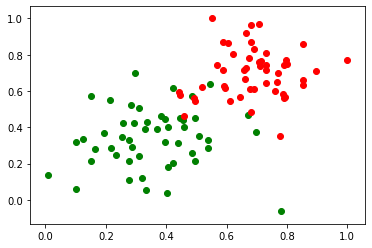

In [231]:
# loading the dataset
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_datapoints(X,y)

In [235]:
data.shape

(100, 3)

In [232]:
# essential functions

# sigmoid function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# calculation of y_hat or prediction 
# sigmoid(Wx +b)
def cal_y_hat(x, weights, bias):
    return sigmoid(np.dot(x,weights) + bias)

# calculation of error function
# log-loss function
def cal_error(y_hat, label):
    return (-(label * np.log(y_hat)) - ((1-label)*(np.log(1 - y_hat))))

# updation of weigts and bias
def update_Weights(x, y, weights, bias, learnrate):
    weights = weights - (learnrate * np.dot((cal_y_hat(x,weights,bias - y)), x) )
    bias = bias - (learnrate * (cal_y_hat(x,weights,bias) - y))
    return weights, bias
    

In [233]:
# set seed
np.random.seed(42)

epochs = 250
learnrate = 0.01

# trainng function
def train(features , labels, epochs, learnrate, graph_lines=False):
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1/n_features ** 0.5, size = n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x,y in zip(features, labels):
            output = cal_y_hat(x, weights, bias)
            error = cal_error(output,y)
            weights,bias = update_Weights(x,y,weights,bias,learnrate)
            
        # printing out the log-loss error on the training set
        out = cal_y_hat(x, weights, bias)
        loss = np.mean(cal_error(output,y))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n    Epoch ",e,"    ")
            if last_loss and last_loss < loss:
                print("Train loss: ",loss,"Warning - loss increasing ")
            else:
                print("Train loss: ",loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == y)   
            print("Accuracy: ",accuracy)
      
       
    # Plotting the solution boundary
    plt.title("Solution boundary")
    x1_min, x1_max = features[:,0].min(), features[:,0].max(),
    x2_min, x2_max = features[:,1].min(), features[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    probs = cal_y_hat(grid,weights,bias).reshape(xx1.shape)
    plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');
    
    # plotting data
    plot_datapoints(features,labels)
    plt.show()
    
    # plotting error 
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()


    Epoch  0     
Train loss:  0.6128649796877782
Accuracy:  1.0

    Epoch  25     
Train loss:  0.30163573934352955
Accuracy:  1.0

    Epoch  50     
Train loss:  0.20602666047404974
Accuracy:  1.0

    Epoch  75     
Train loss:  0.12362174577640346
Accuracy:  1.0

    Epoch  100     
Train loss:  0.06750041369072587
Accuracy:  1.0

    Epoch  125     
Train loss:  0.03457804560891843
Accuracy:  1.0

    Epoch  150     
Train loss:  0.016980237319377443
Accuracy:  1.0

    Epoch  175     
Train loss:  0.008104787203207462
Accuracy:  1.0

    Epoch  200     
Train loss:  0.003793769534340726
Accuracy:  1.0

    Epoch  225     
Train loss:  0.0017520636552373536
Accuracy:  1.0


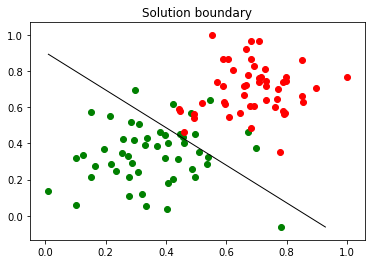

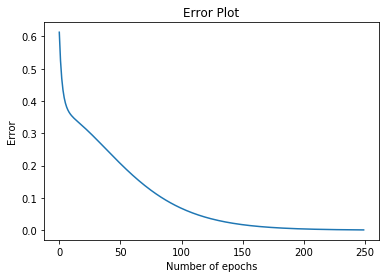

In [234]:
train(X, y, epochs, learnrate)

Hence, from the above two figures, we can see that the gradient descent is able to classify properly and as the number of epochs are increasing, the error is decreasing.